# Trabajo Práctico 5
Implementar un aplicativo que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución visto:
1. Pasabajos: Plano y Bartlett 3x3, 5x5, 7x7. Gaussiano 5x5 y 7x7. 
2. Detectores de bordes: Laplaciano v4 y v8. Sobel las 8 orientaciones.
3. Pasabanda, pasaaltos de frecuencia de corte 0,2 y 0,4

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

Genero una función que transforma la imagen desde el espacio RGB al YIQ.

In [2]:
def rgb_to_yiq(rgb):
    yiq = np.zeros(rgb.shape)
    yiq[:,:,0] = 0.299*rgb[:,:,0] + 0.587*rgb[:,:,1] + 0.114*rgb[:,:,2]
    yiq[:,:,1] = 0.595716*rgb[:,:,0] - 0.274453*rgb[:,:,1] - 0.321263*rgb[:,:,2]
    yiq[:,:,2] = 0.211456*rgb[:,:,0] - 0.522591*rgb[:,:,1] + 0.311135*rgb[:,:,2]
    return yiq

Genero una función que transforma la imagen desde el espacio YIQ al RGB.

In [3]:
def yiq_to_rgb(yiq):
    rgb = np.zeros(yiq.shape)
    rgb[:,:,0] = yiq[:,:,0] + 0.9663*yiq[:,:,1] + 0.6210*yiq[:,:,2]
    rgb[:,:,1] = yiq[:,:,0] - 0.2721*yiq[:,:,1] - 0.6474*yiq[:,:,2]
    rgb[:,:,2] = yiq[:,:,0] - 1.1070*yiq[:,:,1] + 1.7046*yiq[:,:,2]
    return rgb

Genero una función que aplica la transformada de Fourier sobre la luminancia (banda Y) de la imagen.

In [4]:
def fft(yiq):
    img = np.fft.fft2(yiq)
    return img

# Bloque Principal
Leo la imagen original en RGB, la normalizo y luego se transforma al espacio YIQ.

Datos de la imagen original normalizada:
float64
(512, 512, 3)
Datos de luminancia de la imagen:
0.0
0.9999999999999999


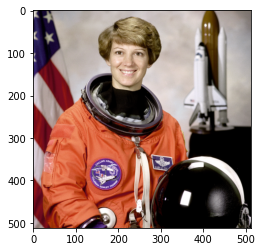

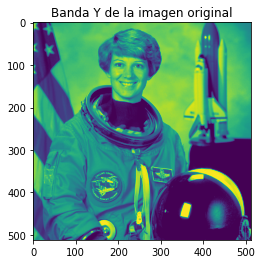

In [5]:
img = imageio.imread('imageio:astronaut.png')/255
print('Datos de la imagen original normalizada:')
print(img.dtype)
print(img.shape)
plt.figure(0)
plt.imshow(img)

img1 = rgb_to_yiq(img)
print('Datos de luminancia de la imagen:')
print(img1[:,:,0].min())
print(img1[:,:,0].max())
plt.figure(2)
plt.title('Banda Y de la imagen original')
plt.imshow(img1[:,:,0])

Creación de un kernel/máscara pasabajos plana.

In [6]:
r=3 #Con este valor definimos el largo del kernel
ker = np.ones((r*2+1,r*2+1))
ker_nor = ker/np.sum(ker)
print('Datos del kernel:')
print(ker.shape)

Datos del kernel:
(7, 7)


Convolucion de la banda Y y el kernel pasabajos plano.

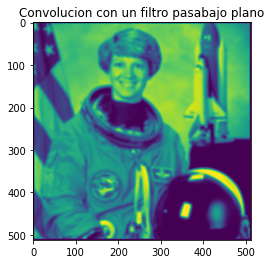

In [7]:
width, height = img1[:,:,0].shape
width_k, height_k = ker_nor.shape
centroK_X = (width_k-1)//2
centroK_Y = (height_k-1)//2
producto = np.zeros(img1[:,:,0].shape)
for x in range (width - width_k + 1):
    for y in range (height - height_k + 1):
        valor = np.sum(img1[x:x+width_k,y:y+height_k,0] * ker_nor[:,:])
        producto[x+centroK_X,y+centroK_Y] = valor
plt.figure(5)
plt.title('Convolucion con un filtro pasabajo plano')
plt.imshow(producto)

Creación de un kernel pasabajos Bartlett.

In [8]:
num = 7 #Largo de la máscara
lista=[]
for x in range(1,num+1):
    if x <= ((num//2)+1):
        val1 = x
        lista.append(val1)
    else:
        if x > ((num//2)+1):
            val2 = num-x+1
            lista.append(val2)
[x,y] = np.meshgrid(lista,lista)
ker_bart = x*y
ker_bart_nor = ker_bart/np.sum(ker_bart)

Convolución de la banda Y y el kernel Bartlett.

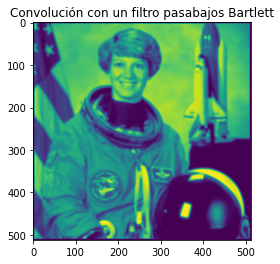

In [9]:
width, height = img1[:,:,0].shape
width_k1, height_k1 = ker_bart_nor.shape
cen_kxbart = (width_k1-1)//2
cen_kybart = (height_k1-1)//2
producto2 = np.zeros(img1[:,:,0].shape)
for x in range (width - width_k1 + 1):
    for y in range (height - height_k1 + 1):
        valor = np.sum(img1[x:x+width_k1,y:y+height_k1,0] * ker_bart_nor[:,:])
        producto2[x+cen_kxbart,y+cen_kybart] = valor
plt.figure(6)
plt.title('Convolución con un filtro pasabajos Bartlett')
plt.imshow(producto2)

Creacion de un kernel pasabajos Gaussiano.

In [10]:
#array3 = [1,2,1]
#array5 = [1,4,6,4,1]
array7 = [1,6,15,20,15,6,1]  #Definimos con cual de los 3 queremos trabajar
[a,b] = np.meshgrid(array7, array7)
ker_gauss = a*b
ker_gauss_nor = ker_gauss/np.sum(ker_gauss)

Convolución de la banda Y y el kernel Gaussiano.

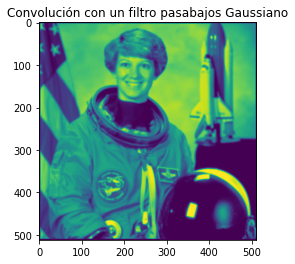

In [11]:
width, height = img1[:,:,0].shape
width_g, height_g = ker_gauss_nor.shape
cen_kxgauss = (width_g-1)//2
cen_kygauss = (height_g-1)//2
producto3 = np.zeros(img1[:,:,0].shape)
for x in range (width - width_g + 1):
    for y in range (height - height_g + 1):
        valor = np.sum(img1[x:x+width_g, y:y+height_g,0] * ker_gauss_nor[:,:])
        producto3[x+cen_kxgauss,y+cen_kygauss] = valor
plt.figure(7)
plt.title('Convolución con un filtro pasabajos Gaussiano')
plt.imshow(producto3)

Creación de un kernel pasaaltos Laplaciano.

In [12]:
n1=4
n2=-(n1/4)
n3=4
n4=-(n3/8)
#ker_lap_v4 = np.array([[0,n2,0],[n2,n1,n2],[0,n2,0]])
ker_lap_v8 = np.array([[n4,n4,n4],[n4,n3,n4],[n4,n4,n4]])

Convolución de la banda Y y el kernel Laplaciano v4 o v8 (3x3).

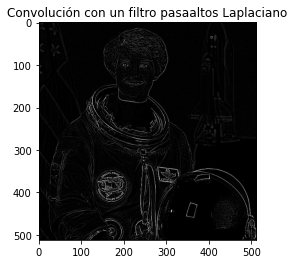

In [13]:
width, height = img1[:,:,0].shape
width_l, height_l = ker_lap_v8.shape
cen_kxlap = (width_l-1)//2
cen_kylap = (height_l-1)//2
producto4 = np.zeros(img1[:,:,0].shape)
for x in range (width-width_l+1):
    for y in range (height-height_l+1):
        valor = np.sum(img1[x:x+width_l, y:y+height_l, 0] * ker_lap_v8[:,:])
        if valor>1:
            valor=1
        elif valor<0:
            valor=0
        producto4[x+cen_kxlap,y+cen_kylap] = valor
plt.figure(8)
plt.title('Convolución con un filtro pasaaltos Laplaciano')
plt.imshow(producto4,'gray')

Creación de un kernel direccional de Sobel.

In [14]:
n1=-2 #asi como esta es un filtro oeste/norte, si se modifica el valor por un negativo es un filtro este/sur
n2=n1/2
n3=-(n1)
n4=-(n2)
#ker_sob:oe = np.array([[n2,0,n4],[n1,0,n3],[n2,0,n4]])
ker_sob_ns = np.array([[n2,n1,n2],[0,0,0],[n4,n3,n4]])

Convolución de la banda Y y el kernel Sobel.

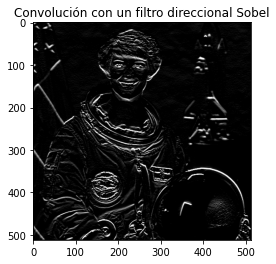

In [15]:
width, height = img1[:,:,0].shape
width_s, height_s = ker_sob_ns.shape
cen_kxsob = (width_s-1)//2
cen_kysob = (height_s-1)//2
producto5 = np.zeros(img1[:,:,0].shape)
for x in range (width-width_s+1):
    for y in range (height-height_s+1):
        valor = np.sum(img1[x:x+width_s, y:y+height_s, 0] * ker_sob_ns[:,:])
        if valor>1:
            valor=1
        elif valor<0:
            valor=0
        producto5[x+cen_kxsob, y+cen_kysob] = valor
plt.figure(9)
plt.title('Convolución con un filtro direccional Sobel')
plt.imshow(producto5,'gray')

Creación de un kernel pasabanda con diferente frecuencia de corte.

In [16]:
array5 = [1,4,6,4,1]
[a,b] = np.meshgrid(array5, array5)
ker_5 = a*b
ker_5_nor = ker_5/np.sum(ker_5)#Definimos el kernel de 5x5

array7 = [1,6,15,20,15,6,1]
[a,b] = np.meshgrid(array7, array7)
ker_7 = a*b
ker_7_nor = ker_7/np.sum(ker_7)#Definimos el kernel de 7x7

ker2_5_nor = np.zeros(ker_7_nor.shape)
ker2_5_nor[1:-1,1:-1] = ker_5_nor[:,:]#Pasamos el kernel 5x5 a 7x7 rellenando los espacios con ceros

ker_pasabanda = ker_7_nor - ker2_5_nor #Hago la diferencia de los 2 kernels

Convolucion de la banda Y y el kernel Pasabanda.

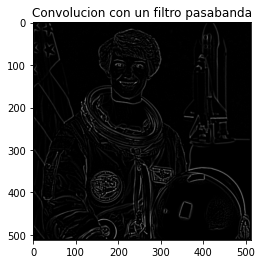

In [17]:
width, height = img1[:,:,0].shape
width_pas, height_pas = ker_pasabanda.shape
cen_kxpas = (width_pas-1)//2
cen_kypas = (height_pas-1)//2
producto6 = np.zeros(img1[:,:,0].shape)
for x in range (width-width_pas+1):
    for y in range (height-height_pas+1):
        valor = np.sum(img1[x:x+width_pas, y:y+height_pas, 0] * ker_pasabanda[:,:])
        if valor>1:
            valor=1
        elif valor<0:
            valor=0
        producto6[x+cen_kxpas, y+cen_kypas] = valor
plt.figure(10)
plt.title('Convolucion con un filtro pasabanda')
plt.imshow(producto6,'gray')